# La expansión acelerada del Universo

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize 
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

## Constante Hubble 1929

In [35]:
data1 = pd.read_csv('/home/felipe/Documentos/Hubble/Hubble-1929.csv')
data1.head(5)

,Object,Dist. (Mpc),Vd. (Km/s)
0,SMC,0.032,170
1,LMC,0.034,290
2,6822,0.214,-130
3,598,0.263,-70
4,221,0.275,-185


In [36]:
x1 = data1['Dist. (Mpc)'].values
y1 = data1['Vd. (Km/s)'].values
Hubble1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1,y1)

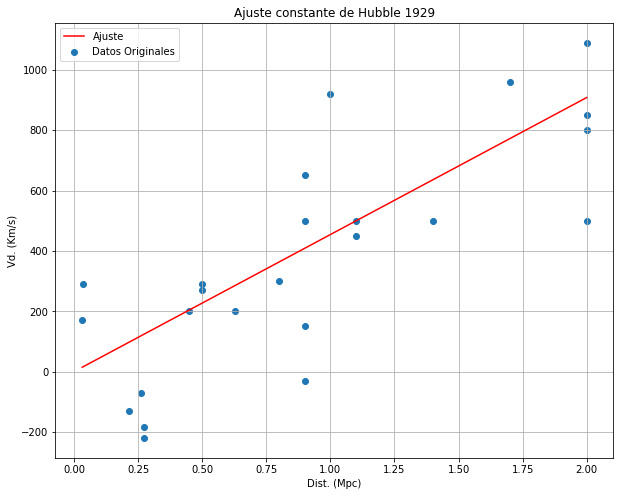

Constante H0 1929 =  454.1584409226284


In [37]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x1,y1,label='Datos Originales')
plt.plot(x1,x1*Hubble1,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1929')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Hubble1929.svg')
print('Constante H0 1929 = ',Hubble1)

## Constante Hubble 1936

In [38]:
data2 = pd.read_csv('/home/felipe/Documentos/Hubble/Hubble-1936.csv')
data2.head(5)

,Clúster,Dist. (Mpc),Vd. (Km/s)
0,Virgo,1.6,890
1,Pegasus,6.8,3810
2,Pisces,8.3,4630
3,Cancer,8.6,4820
4,Perseus,9.4,5230


In [39]:
x2 = data2['Dist. (Mpc)'].values
y2 = data2['Vd. (Km/s)'].values
Hubble2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2,y2)

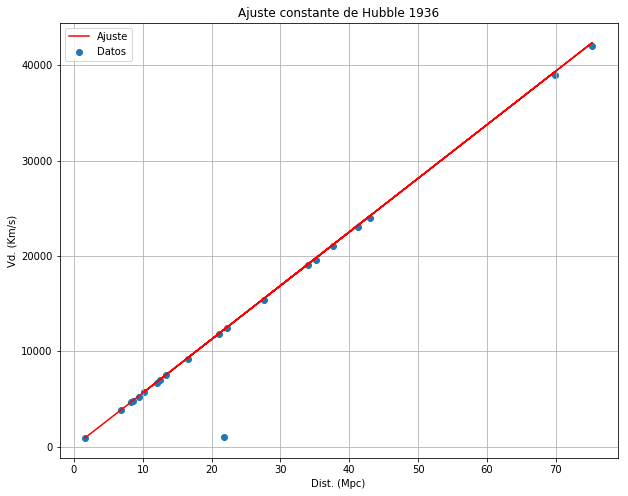

Constante H0 1936 =  562.5446079059137


In [40]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x2,y2,label='Datos')
plt.plot(x2,x2*Hubble2,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1936')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Hubble1936.svg')
print('Constante H0 1936 = ',Hubble2)

In [41]:
x3=np.concatenate((x1,x2),axis=0);
y3=np.concatenate((y1,y2),axis=0);
Hubble3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3,y3)

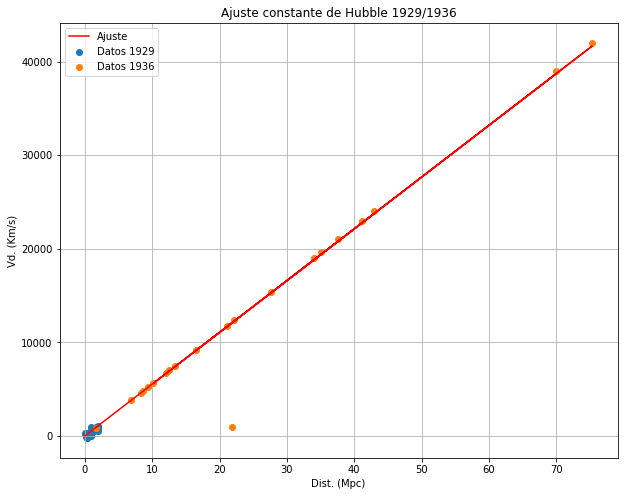

Constante H0 1929/1936 =  553.155606761207


In [42]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x1,y1,label='Datos 1929')
plt.scatter(x2,y2,label='Datos 1936')
plt.plot(x3,x3*Hubble3,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1929/1936')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Hubble1929_1936.svg')
print('Constante H0 1929/1936 = ',Hubble3)

## Constante Hubble Actual

In [43]:
data3 = pd.read_csv('/home/felipe/Documentos/Hubble/Hubble-actual.csv')
data3.head(5)

,Dist. (Mpc),Vd. (Km/s)
0,15,1100
1,97,6700
2,32,2400
3,145,10700
4,50,3100


In [44]:
x4 = data3['Dist. (Mpc)'].values
y4 = data3['Vd. (Km/s)'].values
Hubble4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x4,y4)

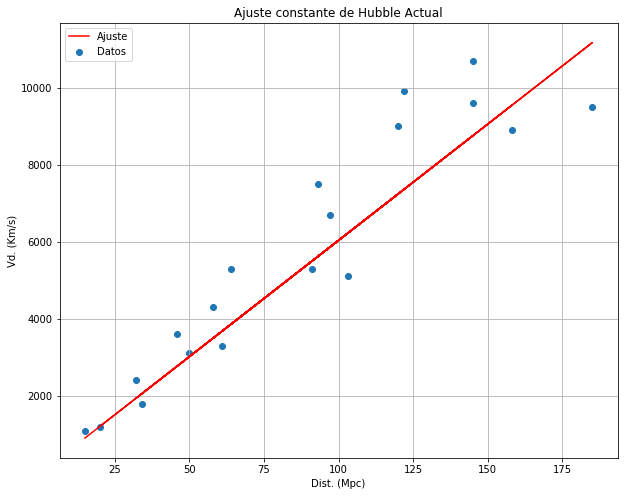

Constante H0 Actual =  60.34548550996037


In [45]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x4,y4,label='Datos')
plt.plot(x4,x4*Hubble4,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble Actual')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('HubbleActual.svg')
print('Constante H0 Actual = ',Hubble4)

### Análisis de la edad del universo a partir de las constantes Hubble estimadas

In [46]:
conv = 3.086e+19
tiempo1 = (conv/Hubble1)/(3.154e+7)
tiempo2 = (conv/Hubble2)/(3.154e+7)
tiempo3 = (conv/Hubble3)/(3.154e+7)
tiempo4 = (conv/Hubble4)/(3.154e+7)
print('Tiempo estimado del universo 1929:',tiempo1/1e+6)
print('Tiempo estimado del universo 1936:',tiempo2/1e+6)
print('Tiempo estimado del universo 1929/1936:',tiempo3/1e+6)
print('Tiempo estimado del universo con datos actuales:',tiempo4/1e+6)

Tiempo estimado del universo 1929: 2154.402490254582
Tiempo estimado del universo 1936: 1739.3110916770077
Tiempo estimado del universo 1929/1936: 1768.8333339378662
Tiempo estimado del universo con datos actuales: 16213.973055736737


## Compilación de Supernovas Tipo IA

In [47]:
data_S = pd.read_csv('/home/felipe/Documentos/Hubble/supernovas.csv')
data_S.head(5)

,Objeto,Redshift,Distancia,error_distancia
0,1993ah,0.028488,35.346583,0.223906
1,1993ag,0.050043,36.682368,0.166829
2,1993o,0.052926,36.817691,0.155756
3,1993b,0.070086,37.446737,0.158467
4,1992bs,0.062668,37.483409,0.156099


In [48]:
z = data_S['Redshift'].values
D =  data_S['Distancia'].values
err =  data_S['error_distancia'].values

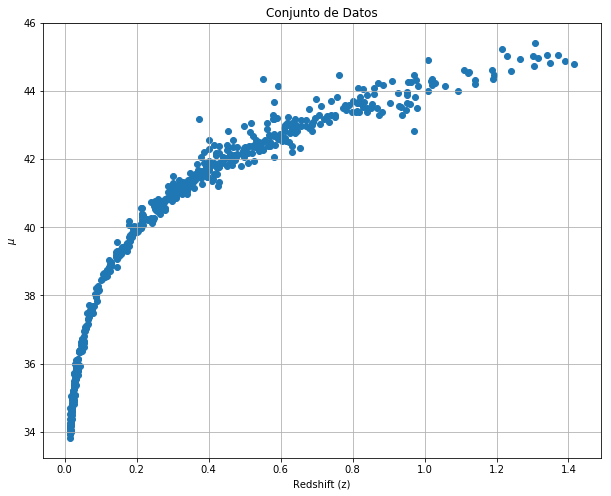

In [49]:
fig = plt.figure(figsize=(10,8))
plt.scatter(z,D)
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Conjunto de Datos')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.grid()
plt.show()
#fig.savefig('Datos.svg')

In [311]:
def argumento(z,Omega_M,Omega_L,Omega_K):
    return 1/np.sqrt(Omega_M*(1+z)**3+Omega_L+Omega_K*(1+z)**2)

def integral_simpson(a,b,Omega_M,Omega_L,Omega_K):
    tramos = 1000
    h = (b-a)/tramos
    x = a
    area = 0
    for i in range(0,tramos,2):
        deltaA =(h/3)*(argumento(x,Omega_M,Omega_L,Omega_K)+4*argumento(x+h,Omega_M,Omega_L,Omega_K)+argumento(x+2*h,Omega_M,Omega_L,Omega_K))
        
        area = area + deltaA
        x = x + 2*h
    return area 

def distancia_luminosa(z,Omega_M,Omega_L,Omega_k,Hubble):
    c = 3e+5 # Constante de la velocidad de la luz
    I = integral_simpson(0,z,Omega_M,Omega_L,Omega_k)
    if(Omega_M+Omega_L>1):
        D = ((1+z)*c/Hubble)*(1/np.sqrt(np.abs(Omega_k)))*np.sin(np.sqrt(np.abs(Omega_k))*I)
    elif(Omega_M+Omega_L==1):
        D = ((1+z)*c/Hubble)*I
    elif(Omega_M+Omega_L<1):
        D = ((1+z)*c/Hubble)*(1/np.sqrt(np.abs(Omega_k)))*np.sinh(np.sqrt(np.abs(Omega_k))*I)
    return D

def funcion_mu(Dl):
    return 5*np.log10(Dl)+25

In [312]:
Omega_M = [0.3,0.3,0.28]
Omega_L = [0,1.0,0.72]
Omega_K = [0.7,-0.3,0]
Dl = np.zeros((3,len(z)))

for i in np.arange(0,3):
    for j in np.arange(0,len(z)):
        Di = distancia_luminosa(z[j],Omega_M[i],Omega_L[i],Omega_K[i],68)
        Dl[i,j]= Di
      

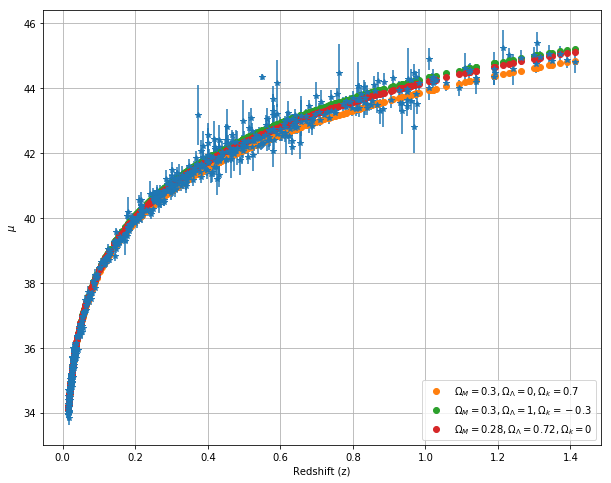

In [313]:
fig =  plt.figure(figsize=(10,8))
plt.errorbar(z,D,yerr=err,fmt='*')
plt.plot(z,funcion_mu(Dl[0,:]),'o',label = '$\Omega_{M}=0.3,\Omega_{\Lambda}=0,\Omega_{k}=0.7$')
plt.plot(z,funcion_mu(Dl[1,:]),'o',label = '$\Omega_{M}=0.3,\Omega_{\Lambda}=1,\Omega_{k}=-0.3$')
plt.plot(z,funcion_mu(Dl[2,:]),'o',label = '$\Omega_{M}=0.28,\Omega_{\Lambda}=0.72,\Omega_{k}=0$')
plt.legend(loc='lower right')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.grid()
plt.show()
#fig.savefig('Comparacion.svg')

In [337]:
Hubble5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(z[np.where(z<0.06)],D[np.where(z<0.06)])

In [348]:
Do=funcion_mu(x4)
zo=y4/3e+5
print('Redshift: ',np.max(zo))

Redshift:  0.035666666666666666


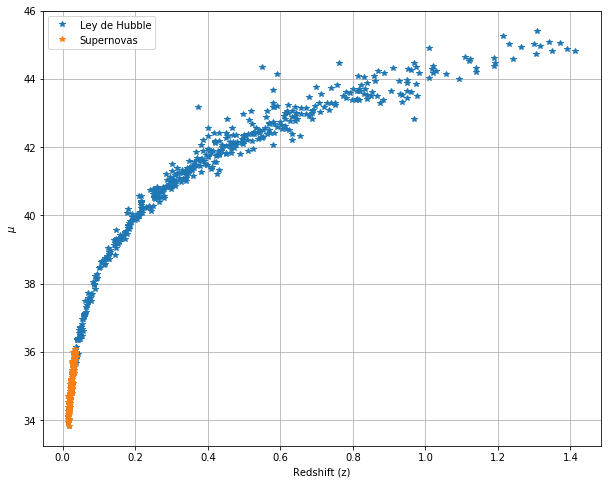

In [419]:
fig =  plt.figure(figsize=(10,8))
plt.plot(z,D,'*',label='Ley de Hubble')
plt.plot(z[np.where(z<np.max(zo))],D[np.where(z<np.max(zo))],'*',label='Supernovas')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Comparacion_punto3.svg')

## Mejor ajuste de los parámetros $\Omega_M$, $\Omega_\Lambda$ y $\Omega_K$

In [281]:
def funcion_objetivo(x):
    Omega_M = x[0]
    Omega_L = x[1]
    Omega_K = 1-Omega_M-Omega_L
    global z,D,err
    if (Omega_L-4/3*Omega_M<1 and Omega_L-3/2*Omega_M>-4.5 and 0<Omega_M<3 and -3<Omega_L<3):
        Dl = distancia_luminosa(z,Omega_M,Omega_L,Omega_K,68)
        mu = funcion_mu(Dl)
        return np.sum(np.multiply((mu-D)**2,1/err**2),axis=0)
    else:
        return 1e+6

In [282]:
x0 = np.array([0.3,1.2])
print('Función objetivo evaluada en el punto (0.3,1.2)',funcion_objetivo(x0))

Función objetivo evaluada en el punto (0.3,1.2) 1415.6993356552975


In [283]:
sol = least_squares(funcion_objetivo, x0)
print('Función objetivo evaluada en el punto óptimo',funcion_objetivo(sol.x))

Función objetivo evaluada en el punto óptimo 909.2582287730538


In [284]:
print('Omega M = ',sol.x[0])
print('Omega Lambda = ',sol.x[1])
print('Omega K = ',1-sol.x[0]-sol.x[1])

Omega M =  0.1219677364592595
Omega Lambda =  0.36980641603431824
Omega K =  0.5082258475064223


In [59]:
Dist = []
for i in np.arange(0,len(z)):
    Di = distancia_luminosa(z[i],sol.x[0],sol.x[1],1-sol.x[0]-sol.x[1],68)
    Dist.append(Di)

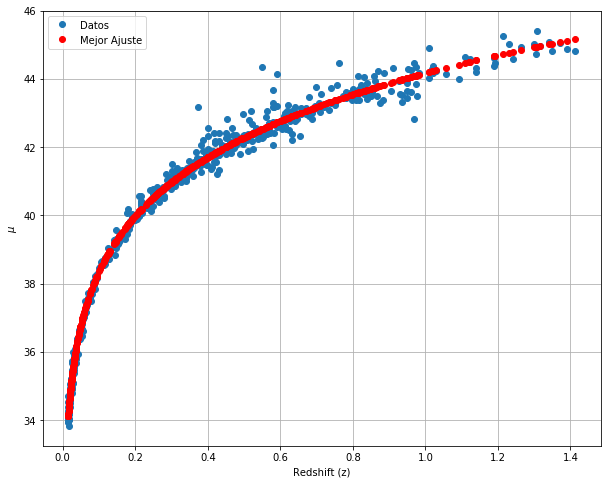

In [273]:
fig =  plt.figure(figsize=(10,8))
plt.plot(z,D,'o',label='Datos')
plt.plot(z,funcion_mu(Dist),'or',label='Mejor Ajuste')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Mejor_ajuste.svg')

## Rutina Monte-Carlo

In [31]:
def monte_carlo(iter,paso):
    a = np.random.uniform(0,3) # Omega_M
    b = np.random.uniform(-3,3) # Omega_L
    x = np.array([a,b]) # Punto inicial
    x0 = x
    err_Ref = funcion_objetivo(x) # Función objetivo evaluada en el punto inicial
    solx = []
    soly = []
    for i in np.arange(1,iter):
        x[0]=np.random.uniform(a-paso,a+paso)
        x[1]=np.random.uniform(b-paso,b+paso)
        while True:
            x[0]=np.random.uniform(a-paso,a+paso)
            x[1]=np.random.uniform(b-paso,b+paso)
            if 0<x[0]<3 and -3<x[1]<3:
                break
        err2=funcion_objetivo(x)
        if(err2<err_Ref):
            err_Ref = err2
            a = x[0]
            b = x[1]
            solx.append(a)
            soly.append(b)
        else:
            s = np.random.binomial(1, 0.8)
            if (s!=1):
                err_Ref = err2
                a = x[0]
                b = x[1]
                solx.append(a)
                soly.append(b)
    return solx,soly,a,b,x0

In [32]:
iter = 1000
paso = 0.05
[solx1,soly1,Om1,OL1,x01]=monte_carlo(iter,paso)
[solx2,soly2,Om2,OL2,x02]=monte_carlo(iter,paso)
[solx3,soly3,Om3,OL3,x03]=monte_carlo(iter,paso)

In [61]:
print('Punto inicial 1 = ',x01)
print('Punto inicial 1 = ',x02)
print('Punto inicial 1 = ',x03)

Punto inicial 1 =  [0.26176821 0.61182771]
Punto inicial 1 =  [0.11543841 0.3090578 ]
Punto inicial 1 =  [0.11549585 0.37860869]


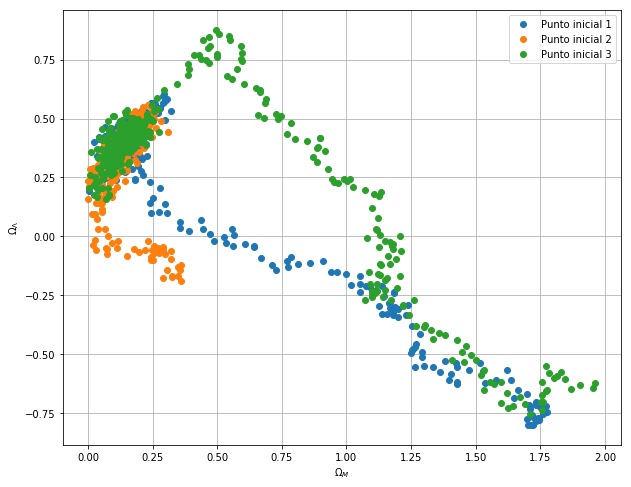

In [62]:
fig =  plt.figure(figsize=(10,8))
plt.plot(solx1,soly1,'o',label='Punto inicial 1')
plt.plot(solx2,soly2,'o',label='Punto inicial 2')
plt.plot(solx3,soly3,'o',label='Punto inicial 3')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Monte_Carlo.svg')

In [63]:
print('Punto inicial 1: ','Omega_M = ',Om1,'Omega_L = ',OL1,'Omega_K = ',1-Om1-OL1)
print('Punto inicial 2: ','Omega_M = ',Om2,'Omega_L = ',OL2,'Omega_K = ',1-Om2-OL2)
print('Punto inicial 3: ','Omega_M = ',Om3,'Omega_L = ',OL3,'Omega_K = ',1-Om3-OL3)

Punto inicial 1:  Omega_M =  0.24322143636842017 Omega_L =  0.5641980908185673 Omega_K =  0.1925804728130125
Punto inicial 2:  Omega_M =  0.11543841022037288 Omega_L =  0.3090578015854637 Omega_K =  0.5755037881941634
Punto inicial 3:  Omega_M =  0.14117952265226885 Omega_L =  0.3934810191162185 Omega_K =  0.4653394582315126


In [360]:
print('Punto inicial 1 error: ',funcion_objetivo(np.array([Om1,OL1])))
print('Punto inicial 2 error: ',funcion_objetivo(np.array([Om2,OL2])))
print('Punto inicial 3 error: ',funcion_objetivo(np.array([Om3,OL3])))

Punto inicial 1 error:  914.4710204040124
Punto inicial 2 error:  911.940084593121
Punto inicial 3 error:  909.3331612562474


In [373]:
# Se agrupan los puntos iniciales obtenidos anteriormente y su error cuadrático medio
S1 = funcion_objetivo(np.array([Om1,OL1]))
S2 = funcion_objetivo(np.array([Om2,OL3]))
S3 = funcion_objetivo(np.array([Om3,OL3]))
S = np.array([S1,S2,S3])
Om = np.array([Om1,Om3,Om3])
OL = np.array([OL1,OL3,OL3])
Om_mejor = Om[np.where(S==np.min(S))]
OL_mejor = OL[np.where(S==np.min(S))]
print('Mejor Omega M ',Om_mejor)
print('Mejor Omega L ',OL_mejor)

Mejor Omega M  [0.14117952]
Mejor Omega L  [0.39348102]


## Comportamiento del residuo cuadrático

In [137]:
val1 = np.arange(0,3,0.1) # Omega_M
val2 = np.arange(-3,3,0.1) # Omega_L
N = len(val1)
M = len(val2)
V1 = np.matlib.repmat(val1, M, 1).transpose()
V2 = np.matlib.repmat(val2, N, 1)
#Om = np.ravel(V1)
#OL = np.ravel(V2)
#con1 = OL-4/3*Om<1
#con2 = OL-3/2*Om>-4.5
chi = np.zeros((N,M))

In [193]:
for i in np.arange(0,N):
    for j in np.arange(0,M):
        x0=np.array([val1[i],val2[j]])
        chi[i,j]=funcion_objetivo(x0)

In [267]:
chi_N = chi/np.min(chi) # Chi cuadrado normalizado respecto al valor mínimo
valor = np.min(chi_N)
posicion=np.where(chi_N==valor)
posicion00=np.where(chi_N<=valor+2.3)
posicion10=np.where(chi_N<=valor+4.61)
posicion20=np.where(chi_N<=valor+6.17)
posicion30=np.where(chi_N<=valor+9.21)

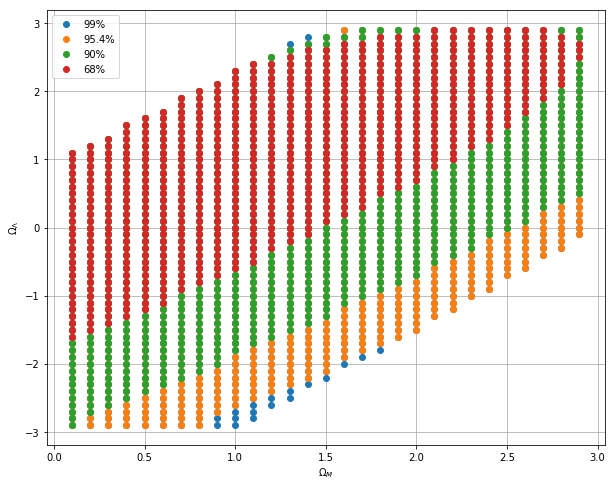

In [268]:
fig =  plt.figure(figsize=(10,8))
#plt.plot(np.ravel(V1)*con1*con2,np.ravel(V2)*con1*con2,'*')
plt.plot(V1[posicion30],V2[posicion30],'o',label='99%')
plt.plot(V1[posicion20],V2[posicion20],'o',label='95.4%')
plt.plot(V1[posicion10],V2[posicion10],'o',label='90%')
plt.plot(V1[posicion00],V2[posicion00],'o',label='68%')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Mapeo.svg')

## Probabilidad Marginal

In [74]:
P = np.exp(-chi_N**2/2) # Probabilidad

In [94]:
Prob_OL=np.sum(P,axis=0)
Prob_Om=np.sum(P,axis=1)
Prob_OL=Prob_OL/np.max(Prob_OL)
Prob_Om=Prob_Om/np.max(Prob_Om)

In [97]:
def funcion_gaussiana(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [110]:
maximo_OL = np.max(Prob_OL)
media_OL = np.max(Prob_OL)
mediana_OL = np.max(Prob_OL)
sigma_OL = np.max(Prob_OL)
ajuste_OL = funcion_gaussiana(val2,maximo_OL,media_OL,std_OL)
popt_L,pcov = curve_fit(funcion_gaussiana,val2,Prob_OL,[1,media_OL,sigma_OL])

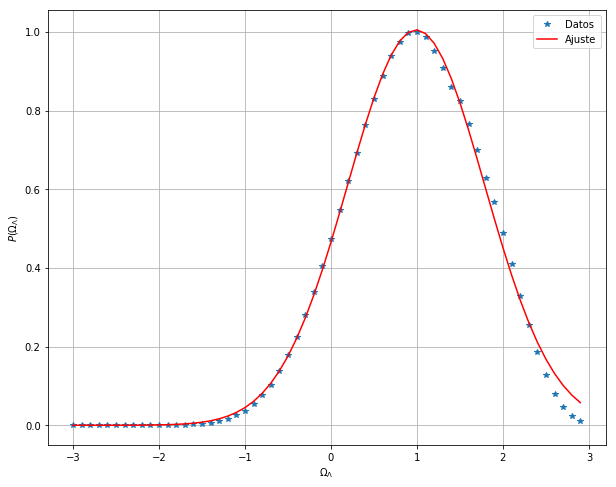

In [288]:
fig =  plt.figure(figsize=(10,8))
plt.plot(val2,Prob_OL,'*',label='Datos')
plt.plot(val2,funcion_gaussiana(val2,*popt_L),'r',label='Ajuste')
plt.xlabel('$\Omega_{\Lambda}$')
plt.ylabel('$P(\Omega_\Lambda)$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Probabilidad_OmegaL.svg')

In [128]:
print('Parámetro Omega L: ',popt_L[1],'desviación estándar ajustada = ',popt_L[2])

Parámetro Omega L:  0.9903675922292422 desviación estándar ajustada =  0.7981306072502891


In [112]:
maximo_Om = np.max(Prob_Om[1:])
media_Om = np.max(Prob_Om[1:])
mediana_Om = np.max(Prob_Om[1:])
sigma_Om = np.max(Prob_Om[1:])
ajuste_Om = funcion_gaussiana(val1[1:],maximo_Om,media_Om,sigma_Om)
popt_M,pcov = curve_fit(funcion_gaussiana,val1[1:],Prob_Om[1:],[1,media_Om,sigma_Om])

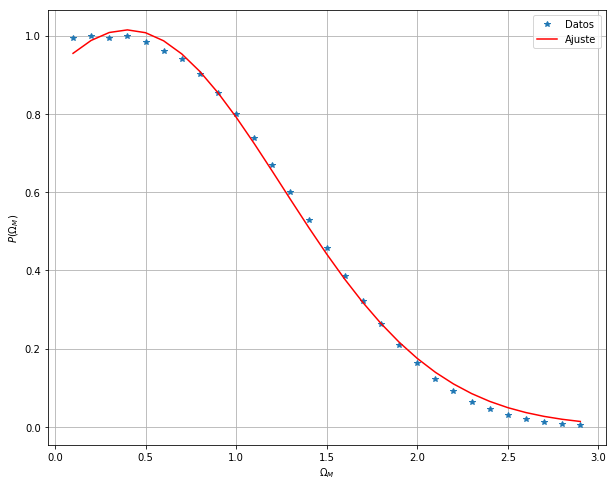

In [289]:
fig =  plt.figure(figsize=(10,8))
plt.plot(val1[1:],Prob_Om[1:],'*',label='Datos')
plt.plot(val1[1:],funcion_gaussiana(val1[1:],*popt_M),'r',label='Ajuste')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$P(\Omega_M)$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Probabilidad_OmegaM.svg')

In [127]:
print('Parámetro Omega M: ',popt_M[1],'desviación estándar ajustada = ',popt_M[2])

Parámetro Omega M:  0.3981693693620749 desviación estándar ajustada =  0.8545540021203495


## Supernovas con redshift $z<0.3$

In [285]:
def funcion_objetivo_menor(x,z,D,err):
    Omega_M = x[0]
    Omega_L = x[1]
    Omega_K = 1-Omega_M-Omega_L
    if (Omega_L-4/3*Omega_M<1 and Omega_L-3/2*Omega_M>-4.5 and 0<Omega_M<3 and -3<Omega_L<3):
        Dl = distancia_luminosa(z,Omega_M,Omega_L,Omega_K,68)
        mu = funcion_mu(Dl)
        return np.sum(np.multiply((mu-D)**2,1/err**2),axis=0)
    else:
        return 1e+6

In [298]:
val1 = np.arange(0,3,0.1) # Omega_M
val2 = np.arange(-3,3,0.1) # Omega_L
N = len(val1)
M = len(val2)
V1 = np.matlib.repmat(val1, M, 1).transpose()
V2 = np.matlib.repmat(val2, N, 1)
#Om = np.ravel(V1)
#OL = np.ravel(V2)
#con1 = OL-4/3*Om<1
#con2 = OL-3/2*Om>-4.5
chi = np.zeros((N,M))

In [300]:
for i in np.arange(0,N):
    for j in np.arange(0,M):
        x0=np.array([val1[i],val2[j]])
        chi[i,j]=funcion_objetivo_menor(x0,z[np.where(z<0.3)],D[np.where(z<0.3)],err[np.where(z<0.3)])

In [301]:
chi_N = chi/np.min(chi) # Chi cuadrado normalizado respecto al valor mínimo
valor = np.min(chi_N)
posicion=np.where(chi_N==valor)
posicion00=np.where(chi_N<=valor+2.3)
posicion10=np.where(chi_N<=valor+4.61)
posicion20=np.where(chi_N<=valor+6.17)
posicion30=np.where(chi_N<=valor+9.21)

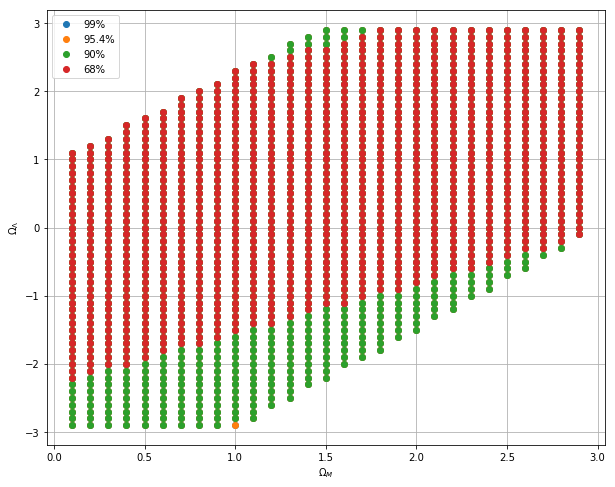

In [302]:
fig =  plt.figure(figsize=(10,8))
#plt.plot(np.ravel(V1)*con1*con2,np.ravel(V2)*con1*con2,'*')
plt.plot(V1[posicion30],V2[posicion30],'o',label='99%')
plt.plot(V1[posicion20],V2[posicion20],'o',label='95.4%')
plt.plot(V1[posicion10],V2[posicion10],'o',label='90%')
plt.plot(V1[posicion00],V2[posicion00],'o',label='68%')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Mapeo_menor.svg')

In [303]:
P = np.exp(-chi_N**2/2) # Probabilidad

In [304]:
Prob_OL=np.sum(P,axis=0)
Prob_Om=np.sum(P,axis=1)
Prob_OL=Prob_OL/np.max(Prob_OL)
Prob_Om=Prob_Om/np.max(Prob_Om)

In [305]:
maximo_OL = np.max(Prob_OL)
media_OL = np.max(Prob_OL)
mediana_OL = np.max(Prob_OL)
sigma_OL = np.max(Prob_OL)
ajuste_OL = funcion_gaussiana(val2,maximo_OL,media_OL,std_OL)
popt_L,pcov = curve_fit(funcion_gaussiana,val2,Prob_OL,[1,media_OL,sigma_OL])

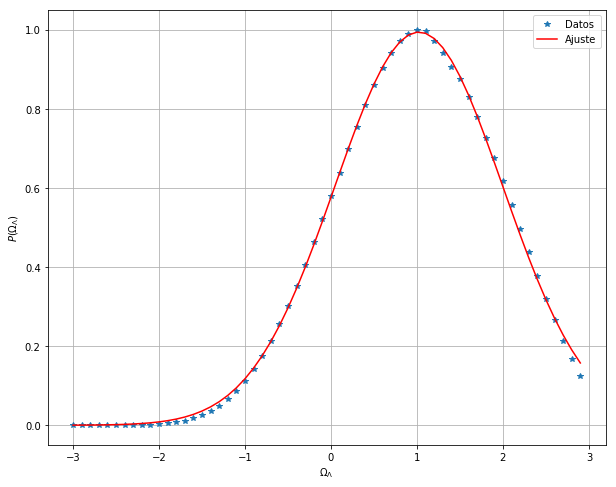

In [306]:
fig =  plt.figure(figsize=(10,8))
plt.plot(val2,Prob_OL,'*',label='Datos')
plt.plot(val2,funcion_gaussiana(val2,*popt_L),'r',label='Ajuste')
plt.xlabel('$\Omega_{\Lambda}$')
plt.ylabel('$P(\Omega_\Lambda)$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Probabilidad_OmegaL_menor.svg')

In [307]:
print('Parámetro Omega L: ',popt_L[1],'desviación estándar ajustada = ',popt_L[2])

Parámetro Omega L:  1.0217554433440872 desviación estándar ajustada =  0.9783828275117821


In [308]:
maximo_Om = np.max(Prob_Om[1:])
media_Om = np.max(Prob_Om[1:])
mediana_Om = np.max(Prob_Om[1:])
sigma_Om = np.max(Prob_Om[1:])
ajuste_Om = funcion_gaussiana(val1[1:],maximo_Om,media_Om,sigma_Om)
popt_M,pcov = curve_fit(funcion_gaussiana,val1[1:],Prob_Om[1:],[1,media_Om,sigma_Om])

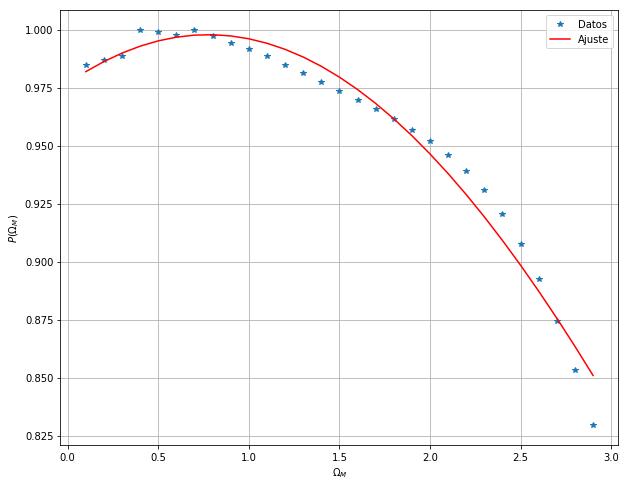

In [309]:
fig =  plt.figure(figsize=(10,8))
plt.plot(val1[1:],Prob_Om[1:],'*',label='Datos')
plt.plot(val1[1:],funcion_gaussiana(val1[1:],*popt_M),'r',label='Ajuste')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$P(\Omega_M)$')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('Probabilidad_OmegaM_menor.svg')

In [310]:
print('Parámetro Omega M: ',popt_M[1],'desviación estándar ajustada = ',popt_M[2])

Parámetro Omega M:  0.7756532763438024 desviación estándar ajustada =  3.7646043379028113


## Comparación de Modelos

In [379]:
tol = [0.01,0.05,0.09]
tol = np.array(tol)

In [398]:
OL_Perturbado=np.concatenate((OL_mejor+OL_mejor*tol,OL_mejor-OL_mejor*tol),axis=0)
Om_Perturbado=np.concatenate((Om_mejor+OL_mejor*tol,Om_mejor-OL_mejor*tol),axis=0)

In [404]:
Chi_ref = funcion_objetivo(np.array([Om_mejor,OL_mejor]))
chi=np.zeros((2*len(tol),1))
for i in np.arange(2*len(tol)):
    chi[i]=funcion_objetivo(np.array([Om_Perturbado[i],OL_Perturbado[i]]))

In [407]:
Prob_ref=np.exp(-1/2)
Prob=np.exp(-(chi/Chi_ref)**2/2)

In [415]:
print('Interpretación de Trota: \n',Prob/Prob_ref)

Interpretación de Trota: 
 [[0.99996352]
 [0.99973603]
 [0.99937807]
 [1.00002832]
 [1.00006001]
 [0.99996106]]


In [417]:
print('Probabilidad: \n',Prob)

Probabilidad: 
 [[0.60650853]
 [0.60637055]
 [0.60615344]
 [0.60654784]
 [0.60656706]
 [0.60650704]]
